[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/multiclass_classification_reuters.ipynb)

# Newswires Multi Class Classification

## Check Tensorflow Version

In [0]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.__version__

'1.9.0-rc1'

## Imports

In [0]:
from tensorflow import keras
from tensorflow.python.keras.datasets import reuters

## Load Reuters dataset

In [0]:
# Use top 10000 frequently used words from the dataset only, discard the rest
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [33]:
train_data.shape

(8982,)

In [34]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [35]:
train_labels.shape

(8982,)

In [36]:
train_labels[0]

3

In [0]:
wrdtoidx = reuters.get_word_index()

In [0]:
idxtowrd = dict([(value, key) for (key, value) in wrdtoidx.items()])

In [0]:
sample_newswire = ' '.join([idxtowrd.get(idx) for idx in train_data[0]])

In [40]:
sample_newswire

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

## Data Preparation

In [0]:
import numpy as np

In [0]:
def one_hot_encoder(samples, no_features):
  output_tensor = np.zeros((len(samples), no_features))
  for idx, sample in enumerate(samples):
    output_tensor[idx, sample] = 1
  return output_tensor

In [0]:
x_train = one_hot_encoder(train_data, 10000)
x_test = one_hot_encoder(test_data, 10000)

In [0]:
y_train = one_hot_encoder(train_labels, 46)
y_test = one_hot_encoder(test_labels, 46)

In [57]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Model

In [0]:
model = keras.models.Sequential()

In [0]:
model.add(keras.layers.Dense(64, activation= 'relu',input_shape = (10000,)))

In [0]:
model.add(keras.layers.Dense(64, activation= 'relu'))

In [0]:
model.add(keras.layers.Dense(46, activation= 'softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Create a dummy validation set

In [0]:
x_val_set = x_train[:1000]
x_train_set = x_train[1000:]

In [0]:
y_val_set = y_train[:1000]
y_train_set = y_train[1000:]

## Train model using training data set

In [65]:
history = model.fit(x_train_set,
          y_train_set,
          epochs=20,
          batch_size=512,
          validation_data=(x_val_set, y_val_set))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 145us/step - loss: 2.5906 - acc: 0.5190 - val_loss: 1.7090 - val_acc: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.4063 - acc: 0.7068 - val_loss: 1.3125 - val_acc: 0.6970
Epoch 3/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.0405 - acc: 0.7798 - val_loss: 1.1424 - val_acc: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.8109 - acc: 0.8319 - val_loss: 1.0220 - val_acc: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.6388 - acc: 0.8685 - val_loss: 0.9650 - val_acc: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5103 - acc: 0.8920 - val_loss: 0.9181 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.4115 - acc: 0.9133 - val_loss: 0.8991 - val_acc: 0.8220
Epoch 

7982/7982 [==============================] - 1s 106us/step - loss: 0.1780 - acc: 0.9535 - val_loss: 0.9290 - val_acc: 0.8140
Epoch 13/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.1645 - acc: 0.9529 - val_loss: 0.9404 - val_acc: 0.8140
Epoch 14/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.1486 - acc: 0.9560 - val_loss: 0.9935 - val_acc: 0.8060
Epoch 15/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.1393 - acc: 0.9555 - val_loss: 0.9750 - val_acc: 0.8180
Epoch 16/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.1287 - acc: 0.9564 - val_loss: 1.0218 - val_acc: 0.8170
Epoch 17/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.1268 - acc: 0.9563 - val_loss: 1.0603 - val_acc: 0.7970
Epoch 18/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.1211 - acc: 0.9558 - val_loss: 1.0455 - val_acc: 0.8100
Epoch 19/20
7982/7982 [==============================] - 1

In [66]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plot the training and validation loss and accuracy

In [0]:
import matplotlib.pyplot as plt

In [0]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1, len(train_acc) + 1)

Text(0,0.5,'Loss')

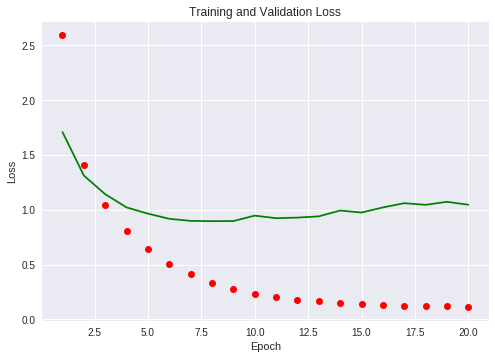

In [70]:
plt.plot(epochs, train_loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Accuracy')

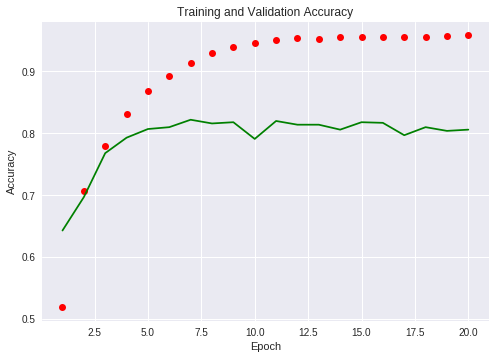

In [71]:
plt.clf()
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## Retrain the entire model for 3 epochs

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
8982/8982 [==============================] - 1s 107us/step - loss: 2.5595 - acc: 0.5424
Epoch 2/8
8982/8982 [==============================] - 1s 70us/step - loss: 1.3432 - acc: 0.7255
Epoch 3/8
8982/8982 [==============================] - 1s 63us/step - loss: 0.9796 - acc: 0.8014
Epoch 4/8
8982/8982 [==============================] - 1s 68us/step - loss: 0.7565 - acc: 0.8456
Epoch 5/8
8982/8982 [==============================] - 1s 70us/step - loss: 0.5950 - acc: 0.8773
Epoch 6/8
8982/8982 [==============================] - 1s 70us/step - loss: 0.4654 - acc: 0.9033
Epoch 7/8
8982/8982 [==============================] - 1s 66us/step - loss: 0.3795 - acc: 0.9233
Epoch 8/8
2246/2246 [==============================] - 0s 195us/step


In [75]:
results

[0.9180641751786162, 0.7969723954226221]

## Predict on test set or new data

In [0]:
predictions = model.predict(x_test)

In [78]:
predictions[0].shape

(46,)

In [79]:
np.argmax(predictions[0])

3